#Homework 1: Linear Models 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

####Question 1

We're going to replicate and extend Fama and French's basic results. Get the 25 Fama French portfolios and the three factors. In the future, you can get updated version from Ken French's website. Subtract the risk free rate $rf$ from the 25 test assets to make them excess returns. The factors $rmrf, \: hml, \: smb$ are already excess returns.

Use the sample from 196301 to the end of the sample. In this way you can see how well FF's results hold up with 20 more years of data. 

FF didn't show us that the CAPM does not work on their portfolios. Once we get over our shock at the size of the value effect in average returns, we should say "oh, sure, we expect that. Value or distressed stocks will have higher betas." And the single-regression betas that the CAPM wants are not the same thing as the multiple regression $b_i$ in the FF model. (Showing that all the $b_i$ can be one while $\beta_i$ perfectly explain average returns is a fun problem which I won't give you.)

So, to start, evaluate the CAPM on these 25 portfolios, as follows. Run time series regressions of

$$R_{t}^{ei}=\alpha _{i}+\beta _{i}(rmrf_{t})+\varepsilon _{t}^{i} ; \ \ t=1,2,...T \ \text{for each }  i=1,2,...25$$

Tabulate $E(R^{ei})$, $\hat\alpha$, $\hat\beta$, $t(\hat\alpha)$ and $R^2$

Make a graph with expected excess return on the vertical axis, and CAPM beta on the horizontal axis. Include the 25 portfolios as points, and the market $rmrf$. Draw a line from the origin through to $(1, \:E(rmrf))$ to display the CAPM's predictions.

Optional but worth it: Add vertical errorbars showing one alpha standard deviation and horizontal errorbars showing one beta standard deviation. This gives you some sense of statistical uncertainty. Add lines connecting size in b/m categories, and in a separate graph lines connecting b/m portfolios in size categories. This will visually display how expected returns line up with size and b/m in the data (The graphs in "Asset Pricing" do this.)

To check if you got this right, enter the first row (smallest stocks, from growth to value, corresponding to 0.27 to 1.16 mean return) of the CAPM betas. You will enter 5 numbers, separated by spaces, in percent, to two decimal places accuracy. To get you started, the first number should be 1.43.

In [2]:
#Load Fama and French 3 Factor Portfolio
ff3 = pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing%2Fdata%2Fff_factors.txt',
                  skiprows=6, sep='\s+', index_col=0, parse_dates={'date':['%']},
                  date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))

#Load the 25 factors portfolio
ff25 = pd.read_csv('https://d396qusza40orc.cloudfront.net/assetpricing%2Fdata%2Fff_25.txt',
                  skiprows=5, sep='\s+', index_col=0, parse_dates={'date':['%']},
                  date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))

ff25.rename(columns={i:j for (i,j) in zip(ff25.columns, [i for i in range(1,26)])}, inplace=True)
ff25_rets = ff25['1963-01-01':].subtract(ff3.ix['1963-01-01':,'RF'], axis=0)

rets = pd.DataFrame(np.round(ff25_rets.mean().reshape(5,5),2), 
                    index=range(1,6), columns=range(1,6))
rets

,1,2,3,4,5
1,0.27,0.79,0.83,1.01,1.16
2,0.46,0.71,0.91,0.94,1.02
3,0.48,0.77,0.77,0.87,1.08
4,0.59,0.56,0.70,0.85,0.86
5,0.45,0.50,0.47,0.56,0.63


In [3]:
regr = [sm.ols(formula='rets ~ rmrf', data={'rets' : ff25_rets[i], 
        'rmrf': ff3.ix['1963-01-01':,'Mkt-RF']}).fit() for i in range(1,26)]

betas = pd.DataFrame(np.array([regr[i].params.rmrf for i in range(25)]).reshape(5,5), 
                     index=range(1,6), columns=range(1,6))

print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*betas.ix[1,:]))
betas

1.4321 1.2279 1.0977 1.0174 1.0795


,1,2,3,4,5
1,1.432092,1.227853,1.097706,1.017440,1.079495
2,1.398385,1.170330,1.056909,1.013623,1.112215
3,1.328747,1.119927,1.001768,0.957269,1.027218
4,1.218821,1.081925,1.025116,0.954265,1.039381
5,0.987316,0.932120,0.871272,0.828399,0.891324


####Question 2
Enter the first row of CAPM alphas. 

In [4]:
alphas = pd.DataFrame(np.array([regr[i].params.Intercept for i in range(25)]).reshape(5,5),
                      index=range(1,6), columns=range(1,6))

print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*alphas.ix[1,:]))
alphas

-0.4299 0.1827 0.2924 0.5080 0.6278


,1,2,3,4,5
1,-0.429911,0.182731,0.292398,0.508024,0.627779
2,-0.221895,0.140144,0.394616,0.441376,0.479343
3,-0.170661,0.219606,0.283360,0.404054,0.572289
4,-0.009039,0.027179,0.200919,0.385051,0.349793
5,-0.038597,0.044434,0.045386,0.153210,0.194249


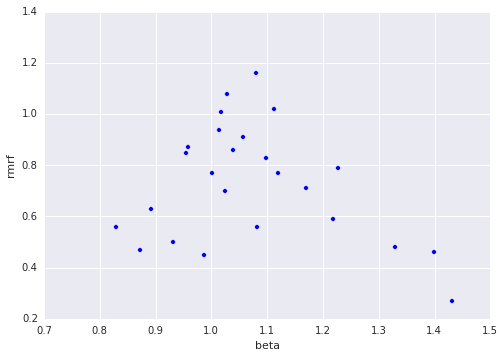

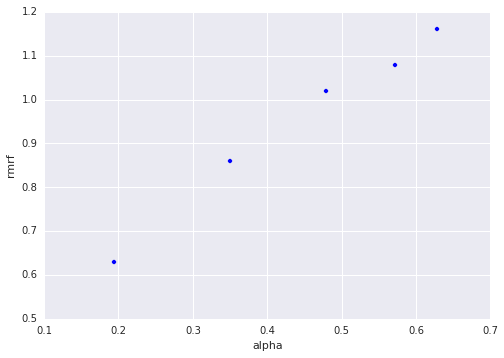

In [10]:
plt.scatter(betas, rets)
plt.xlabel('beta')
plt.ylabel('rmrf')
plt.figure()
plt.scatter(alphas[5], rets[5])
plt.xlabel('alpha')
plt.ylabel('rmrf');

####Question 3
The spread in average returns is large, 0.45 to 1.16 percent per month. In the Fama-French three-factor model, the market betas were all about one with other factors included. What does your graph or table of average returns vs. CAPM betas look like? 

>**Answer: There is a wide spread in betas,with the potential to explain average returns. Alas, there is essentially no correlation between average returns and betas, so the graph is a big cloud**. 

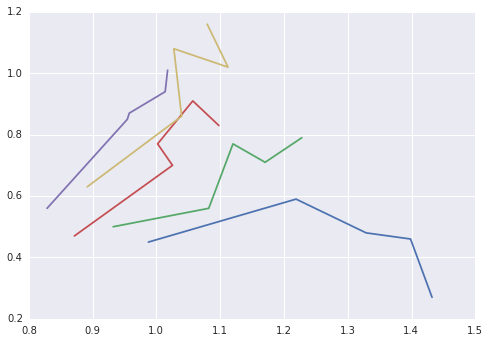

In [6]:
plt.plot(betas, rets);
#plt.plot(betas.T, rets.T);

####Question 4

Now, look at the relation between market beta and average returns within size holding b/m constant, or within b/m holding size constant. If you have tables of numbers, look across rows and up and down columns. If you made an ER vs. beta graph with lines connecting size and another connecting BM, the pattern will be even clearer. What accounts for the failure of the CAPM? 

>**Answer: Average returns and betas are positively correlated across size categories holding bm constant. The real problem is value: higher beta portfolios have lower average returns there. The model goes the wrong way!**

####Question 5

Repeat your analysis using the 193201-196212 time period.

1.8049 1.8607 1.6388 1.5095 1.6729


,1,2,3,4,5
1,1.804934,1.860664,1.638821,1.509522,1.672870
2,1.183711,1.368510,1.409677,1.443163,1.651772
3,1.297726,1.148302,1.305203,1.293232,1.701308
4,0.957756,1.150329,1.183488,1.389025,1.760104
5,0.936773,0.888074,1.057908,1.346684,1.365241


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.x-py3.4-linux-x86_64.egg/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


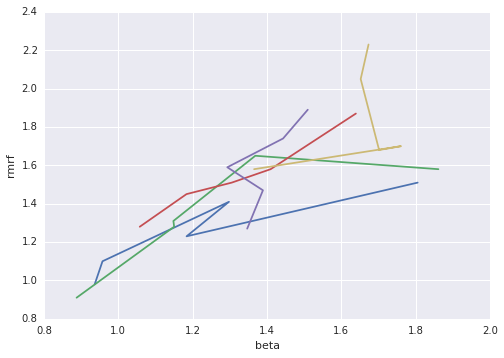

In [15]:
ff25_rets_32_62 = ff25['1932-01-01':'1962-12-01'].subtract(ff3.ix['1932-01-01':'1962-12-01','RF'], 
                                                           axis=0)

regr_32_62 = [sm.ols(formula='rets ~ rmrf', data={'rets' : ff25_rets_32_62[i], 
                    'rmrf' : ff3.ix['1932-01-01':'1962-12-01','Mkt-RF']}).fit() 
              for i in range(1,26)]

betas_32_62 = pd.DataFrame(np.array([regr_32_62[i].params.rmrf for i in range(25)]).reshape(5,5), 
                     index=range(1,6), columns=range(1,6))

print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*betas_32_62.ix[1,:]))


rets_32_62 = pd.DataFrame(np.round(ff25_rets_32_62.mean().reshape(5,5),2), 
                          index=range(1,6), columns=range(1,6))
plt.plot(betas_32_62, rets_32_62)
plt.xlabel('beta')
plt.ylabel('rmrf')

betas_32_62

>**Answer: There is still a large spread in average returns, but now betas line up with average returns, along both size and b/m dimensions** 

####Question 7
Enough warmup! Now, let's do the Fama French 3-factor model in the 196301-now period. Make 5 x 5 tables of alphas, alpha t statstics, b, h, s, and R2. 

In [5]:
regr_ff3 = [sm.ols(formula='rets ~ rmrf + hml + smb', 
            data=pd.DataFrame(np.c_[ff25_rets[i], ff3.ix['1963-01-01':,['Mkt-RF', 'HML', 'SMB']]], 
            columns=['rets', 'rmrf', 'hml', 'smb'])).fit() for i in range(1,26)]

h_ff3 = pd.DataFrame(np.array([regr_ff3[i].params.hml for i in range(25)]).reshape(5,5), 
                     index=range(1,6), columns=range(1,6))

print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*h_ff3.ix[1,:]))
h_ff3

-0.3059 0.0370 0.2786 0.4534 0.6947


,1,2,3,4,5
1,-0.305853,0.037038,0.278560,0.453418,0.694685
2,-0.384077,0.129327,0.389538,0.565771,0.803284
3,-0.436281,0.184410,0.442070,0.613767,0.775838
4,-0.424794,0.212467,0.451057,0.577749,0.805461
5,-0.364674,0.101013,0.292025,0.599744,0.765924


In [18]:
alphas_ff3 = pd.DataFrame(np.array([regr_ff3[i].params.Intercept 
                          for i in range(25)]).reshape(5,5), index=range(1,6), 
                          columns=range(1,6))

print('{:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(*alphas_ff3.ix[1,:]))
alphas_ff3

-0.4845 -0.0283 -0.0052 0.1347 0.1297


,1,2,3,4,5
1,-0.484500,-0.028264,-0.005228,0.134681,0.129689
2,-0.181225,-0.052634,0.090948,0.060162,-0.037820
3,-0.067894,0.051402,0.004385,0.047926,0.115692
4,0.139403,-0.107916,-0.043563,0.071939,-0.076682
5,0.173886,0.028358,-0.062208,-0.107067,-0.163854


In [10]:
T_alphas = pd.DataFrame(np.array([regr_ff3[i].tvalues.Intercept for i in range(25)]).reshape(5,5), 
                       index=range(1,6), columns=range(1,6))

T_alphas

,1,2,3,4,5
1,0.918790,0.942488,0.951760,0.945114,0.946440
2,0.950862,0.943965,0.938455,0.939969,0.947866
3,0.950404,0.911371,0.897436,0.901310,0.894696
4,0.936640,0.889970,0.882811,0.888130,0.874416
5,0.940518,0.900539,0.855308,0.892608,0.806181


####Question 9

Now, compare your results to Fama and French's. How have things changed by the addition of more data? 

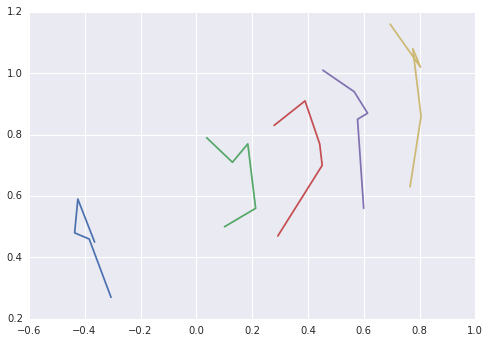

In [11]:
plt.plot(h_ff3, rets);

>**Answer: The overall pattern of average returns has not changed that much**

####Question 10

Momentum poses an interesting challenge. Momentum is, like dividend-yield forecasts, a new way of seeing the economic importance of an old fact.

Recall, we worked out that if

$$\begin{eqnarray*}
r_{t+1} &=&b\times dp_{t}+\varepsilon _{t+1}^{r} \\
dp_{t+1} &=&\phi dp_{t}+\varepsilon _{t+1}^{dp}
\end{eqnarray*}$$

then

$$ (r_{t+1}+r_{t+2})=b(1+\phi )dp_{t}+\delta _{t+k} $$

$$R^{2}\approx \frac{b^{2}(1+\phi )^{2}\sigma ^{2}(dp)}{2\sigma ^{2}(r)} $$

so if $\phi≈1$, the coefficient and $R^2$ grows linearly with horizon. Thus, a coefficient and $R^2$ that would seem economically and insignificant at monthly horizon -- $b=0.01$ and $R^2=0.01$ -- would grow to, say, $b=0.50$ and $R^2=0.50$ at a 4 year (48 month) horizon. (A little less, actually, as $\phi≈0.04<1$.)

In this problem you will work out that momentum is a similar way to see the implications of an old fact. Individual stock returns have large volatilities; we'll use 50% in this problem. Individual stocks have a very small autocorrelation. So, let's suppose $R_{t+1}=0.05R_t+\:\epsilon_{t+1}$. Use $\sigma(\epsilon)=0.50$, a $50\%$ standard deviation. Yes, large numbers like this are typical of most (small) stocks. This is a really small autocorrelation. The $R^2$ is $0.052=0.0025$.

So, is this enough to generate momentum? We can do it analytically, but it will be much faster to do it on a computer. Simulate T=500 years of data for N=500 stocks behaving this way with independent normal errors $\epsilon$. At the end of each year, form an equally weighted portfolio of the 1/10 "winners" and the 1/10 "losers." Calculate the returns on the winner and loser portfolios for the next year. Tabulate the mean, standard deviation, and Sharpe ratio from these portfolios. 

Enter the mean, standard deviation, and Sharpe ratio of the winner portfolio. (You should find the loser is the same with negative mean. If not you're doing something wrong.)

In [19]:
N = T = 500
phi = 0.05
xobs = np.zeros((T, N))
sigma_eps = 0.5
eps = np.random.normal(loc = 0, scale = sigma_eps, size = (T, N))

# create x_t as AR1 process from the sigma_epsilon
for i in range(1, T):
    xobs[i, :] = phi * xobs[i-1, :] + eps[i, :]

# create the winner and loser subportfolios
port_win  = np.zeros((T-1, N/10))    
port_lose = np.zeros((T-1, N/10))    
port_ret = np.zeros((T-1, 2))    
for i in range(T-1):
    # group the data in two observation at the time
    port = pd.DataFrame(xobs[i:i+2, :])
    # sort the data by row by looking at the previous winner and losers and report 
    # current results
    port_win[i, :]  = port.T.sort(columns=port.index[0], ascending=False).T.ix[1][:50]
    port_lose[i, :] = port.T.sort(columns=port.index[0], ascending=True).T.ix[1][:50]
    port_ret[i, :] = [port_win[i, :].dot(np.ones(N/10)/(N/10)), 
                      port_lose[i, :].dot(np.ones(N/10)/(N/10))]

    
print('{:.4f} {:.4f}'.format(port_ret[:, 0].mean() , port_ret[:, 1].mean()))
print('{:.4f} {:.4f} {:.4f}'.format(port_ret[:, 0].mean() * 100, port_ret[:, 0].std() * 100, 
                                    port_ret[:, 0].mean() / port_ret[:, 0].std()))

0.0435 -0.0428
4.3506 6.7391 0.6456
